In [1]:
import utils_rag as ur

from cleaner_data import text_cleaner
import json 
from collections import defaultdict
from rich.markdown import Markdown as rich_Markdown

import time

In [2]:
# Ejemplo de uso
ruta_archivo = 'data/chunks_docs/dict_pdfs.json'
dict_pdfs = ur.cargar_json(ruta_archivo)


In [3]:
print(json.dumps(dict_pdfs, indent=4))

{
    "file1": {
        "file_path": "data/docs/DT_Golondrinas.pdf",
        "output_path": "data/chunks_docs/chunks_DT_Golondrinas.json"
    },
    "file2": {
        "file_path": "data/docs/Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.pdf",
        "output_path": "data/chunks_docs/chunks_Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.json"
    },
    "file3": {
        "file_path": "data/docs/DeepSeek_R1.pdf",
        "output_path": "data/chunks_docs/chunks_DeepSeek_R1.json"
    }
}


In [4]:
doc_1 = dict_pdfs['file2']
doc_2 = dict_pdfs['file1']
chunks_docs_1 = ur.ejecutar_chunking_pdf(doc_1,ejecutar_pdf=False)
chunks_docs_2 = ur.ejecutar_chunking_pdf(doc_2,ejecutar_pdf=False)

In [6]:
#ur.display_chunk_pages(chunks_docs_1[15],doc_1['file_path'])

# Doc Tesis

In [7]:
chapters_1 = [
    "Introducción",
    "1.1. Problema",
    "1.2. Hipótesis",
    "1.3. Objetivos",
    "1.4. Organización de la tesis ",
    "2.1. Antecedentes",
    "2.2. Trabajos afines",
    "3.1. Análisis descriptivo",
    "3.2. Análisis de variables categóricas",
    "3.3. Modelamiento del problema",
    "3.4. Creación de Gold Standard y rendimiento humano",
    "3.5. Métricas utilizadas",
    "3.6. Despliegue",
    "4.1. Gold Standard y acuerdo humano",
    "4.2. Resultado de los modelos",
    "4.3. Limitaciones",

    "4.4. Despliegue",
    "5.1. Propuestas de aplicaciones en cáncer",
    "5.2. Un caso de aplicación: Dashboard DEIS",
    "6.1. Conclusiones",

    "6.2. Trabajo futuro",
    "6.3. Contribuciones",

    "Bibliografía",
    "Anexos"


]

In [8]:
chapters_2 = [
    "PRESENTACIÓN",
    "RESUMEN",
    "1. INTRODUCCIÓN",
    "2. IMPACTOS AMBIENTALES",
    "Impactos potenciales asociados a golondrinas de mar",
    "3.1 Metodologías de trabajo en terreno",
    "3.2 Procedimientos específicos",
    "3.3 Entrega de datos",
    "4. MEDIDAS O COMPROMISOS AMBIENTALES VOLUNTARIOS",
    "5. PLAN DE SEGUIMIENTO",
    "5.1 Recolección y resguardo",
    "5.2 Traslado al centro de rescate y rehabilitación",
    "5.3 Proceso de liberación",
    "5.4 Monitoreo",
    "BIBLIOGRAFÍA"


]

In [9]:
chapter_ids_1 = ur.get_chapters(chunks_docs_1, chapters_1,'doc_1', save=True)
chapter_ids_2 = ur.get_chapters(chunks_docs_2, chapters_2,'doc_2', save=True)

In [10]:
text_chunks_1, tables_html_chunks_1, images_b64_chunks_1 = ur.extract_text_with_page_mapping_v2(chunks_docs_1,chapters_1,chapter_ids_1,'doc_1',min_page_number=9,save=True)

Mapeando Capítulo: Introducción - Element_id: 9e8cf813-bea2-4270-894e-b9731069023d
Mapeando Capítulo: 1.1. Problema - Element_id: 1abcc70d-9af5-44d4-a99a-03a25311e2c4
Mapeando Capítulo: 1.2. Hipótesis - Element_id: 14d9fee2-3f06-4466-bc2f-d9ced155b7eb
Mapeando Capítulo: 1.3. Objetivos - Element_id: b4abc9d3-554b-4c1e-a642-63a656beefc2
Mapeando Capítulo: 2.1. Antecedentes - Element_id: ef00ee8e-d49d-4c3a-8a5a-60f96b8f1a64
Mapeando Capítulo: 2.2. Trabajos afines - Element_id: f212880a-1f50-48e5-aa55-a826d6bc33ea
Mapeando Capítulo: 3.1. Análisis descriptivo - Element_id: 0dcb8e8d-67fc-4f14-92ac-91a43bb39e10
Mapeando Capítulo: 3.2. Análisis de variables categóricas - Element_id: c686097b-e779-4fce-866f-82bff9849c9e
Mapeando Capítulo: 3.3. Modelamiento del problema - Element_id: cba9108a-9a3a-4e75-908d-7c6caccb8da9
Mapeando Capítulo: 3.5. Métricas utilizadas - Element_id: e1197a45-afcd-42c3-b112-5eee417ab09d
Mapeando Capítulo: 3.6. Despliegue - Element_id: 5cdcfde5-8421-433f-b176-dd9db9f805

In [11]:
text_chunks_2, tables_html_chunks_2, images_b64_chunks_2 = ur.extract_text_with_page_mapping_v2(chunks_docs_2,chapters_2,chapter_ids_2,'doc_2',min_page_number=7,save=True)

Mapeando Capítulo: PRESENTACIÓN - Element_id: 29a9e1cf-7f32-4811-99f2-35d7e88d74e8
Mapeando Capítulo: RESUMEN - Element_id: 91ab54fd-2b25-45fb-9514-a8b9200206b9
Mapeando Capítulo: 1. INTRODUCCIÓN - Element_id: 48c9b959-1f02-4a1d-ab45-b85226aad76b
Mapeando Capítulo: 2. IMPACTOS AMBIENTALES - Element_id: 1f3b3cf5-5fe1-472e-9979-c6c304dc14d7
Mapeando Capítulo: Impactos potenciales asociados a golondrinas de mar - Element_id: 12e10bbe-6a10-4dc7-9454-67ac923e96b6
Mapeando Capítulo: 3.2 Procedimientos específicos - Element_id: b4619eb2-ef0f-4089-ad22-0f9313ffc2de
Mapeando Capítulo: 3.3 Entrega de datos - Element_id: d5823a7c-daba-4c7a-b65c-4187294df021
Mapeando Capítulo: 4. MEDIDAS O COMPROMISOS AMBIENTALES VOLUNTARIOS - Element_id: 86c31bfb-6b91-4244-8883-3ea917b2c3e4
Mapeando Capítulo: 5. PLAN DE SEGUIMIENTO - Element_id: 984b671b-a328-435b-be21-f34ec7d76de6
Mapeando Capítulo: 5.1 Recolección y resguardo - Element_id: ca7a3a08-758c-4554-a26e-5d1563f14f8d
Mapeando Capítulo: 5.3 Proceso de l

## Gemini API

In [12]:
#%pip install -qU langchain-google-genai
#%pip install google-cloud-aiplatform


In [ ]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = "..."

    

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0
)

In [19]:
batch_results

[{'summary': 'La tesis presenta la implementación de un sistema de codificación automática para diagnósticos en registros electrónicos de pacientes en Chile, utilizando procesamiento del lenguaje natural y aprendizaje profundo. El sistema, basado en reconocimiento de entidades nombradas y Entity Linking, logró aumentar la codificación de diagnósticos del 26% al 74% en promedio, con un incremento del 1% al 77% en la mediana por servicio de salud. Se propone un flujo de trabajo para implementar el sistema en nuevos registros y se realizaron estudios sobre el perfil sociodemográfico de los pacientes y los tiempos de espera. El trabajo agradece a diversas personas e instituciones por su apoyo y financiamiento.',
  'page_number': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'filename': 'Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.pdf',
  'chapter_id': '',
  'status': 'success'},
 {'summary': 'Es esencial contar con registros médicos estandarizados 

In [ ]:
# Batch processing
time_start = time.time()
batch_results = ur.process_texts(text_chunks_1,llm
                              ,text_key='text'
                              ,name_dir='doc_1'
                              ,save = False
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 22/22 [02:48<00:00,  7.64s/it]

Cantidad de tokens procesados: 35079
La ruta ya existe: data/chunks_docs/doc_1
processing time: 171.34 seconds


In [20]:
# Batch processing
time_start = time.time()
batch_results_tables = ur.process_texts(tables_html_chunks_1,llm
                              ,text_key='text_html'
                              ,name_dir='doc_1'
                              ,save = False
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 31/31 [03:47<00:00,  7.34s/it]

Cantidad de tokens procesados: 30622
La ruta ya existe: data/chunks_docs/doc_1
processing time: 227.61 seconds


In [21]:
tables_html_chunks_1

[{'text_html': '<table><tbody><tr><td>1. Problema</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td>. .</td><td>.</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>.</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr><tr><td>2. Hipotesis .</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>e,</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr><tr><td>3. Objetivos</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td>.</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>

In [22]:
batch_results_tables

[{'summary': 'La tabla presenta una estructura de tesis que abarca desde la definición del problema, la formulación de hipótesis y objetivos (general y específicos), hasta la metodología y la organización de la tesis. Incluye antecedentes y trabajos afines, con un enfoque en el sistema de salud de Chile, la atención pública, el proceso de atención ambulatoria, la inteligencia artificial, el aprendizaje automático, las redes neuronales y el aprendizaje profundo. Además, aborda la creación de un Gold Standard, la codificación del rendimiento humano y las métricas utilizadas, como Intersection Over Union (IoU) y Mean Average Precision (MAP). En resumen, la tabla detalla los componentes esenciales y la estructura de una tesis, con un enfoque particular en el ámbito de la salud y la aplicación de técnicas de inteligencia artificial y aprendizaje automático.',
  'page_number': [5],
  'filename': 'Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chi

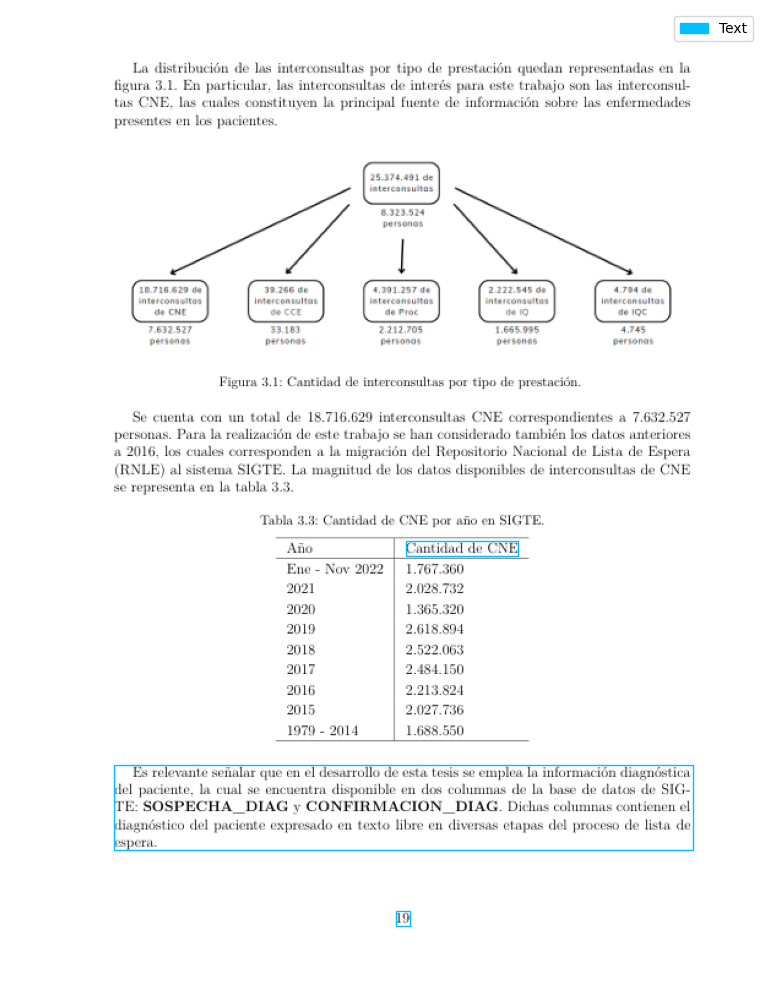

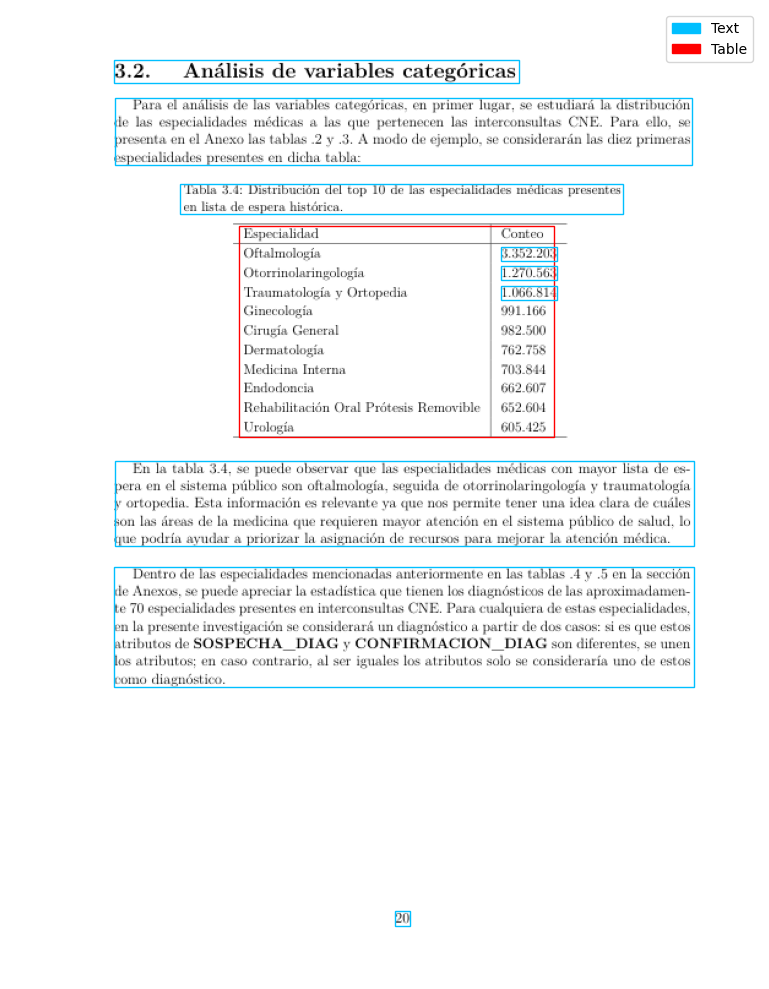

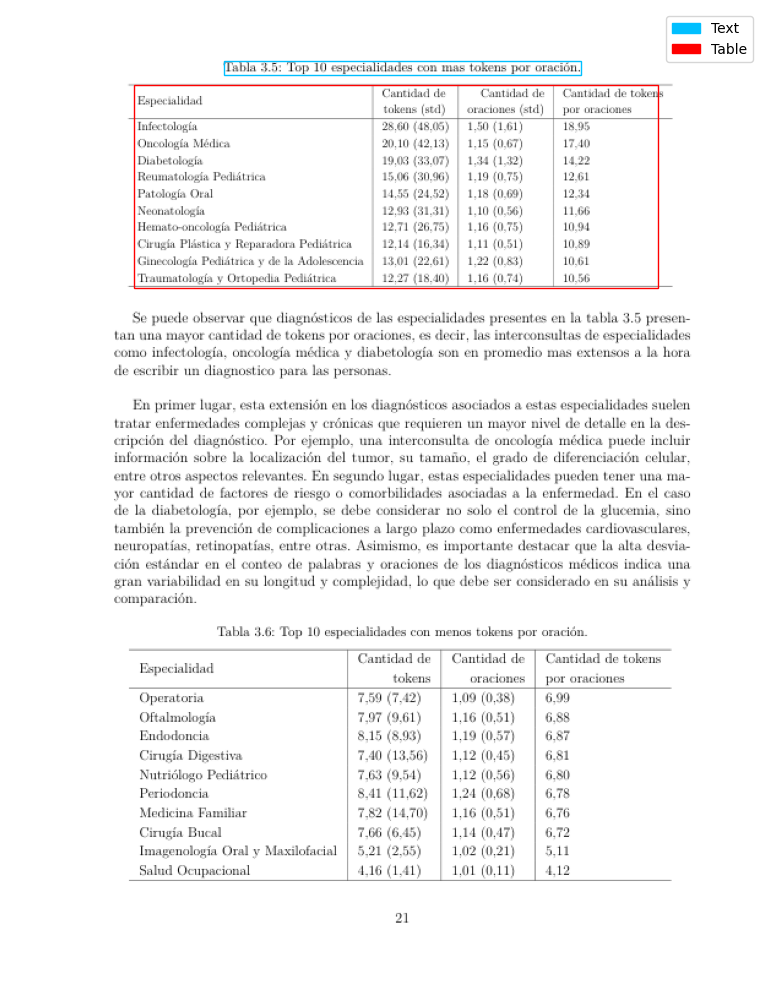

In [18]:
ur.display_chunk_pages(chunks_docs_1[18],doc_1['file_path'])

In [ ]:
# Batch processing
time_start = time.time()
batch_results_image = ur.process_images(images_b64_chunks_1,llm
                              ,imagen_key='images_b64'
                              ,resize=(128,128)
                              ,name_dir='doc_1'
                              ,save = True)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"Batch processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente:  57%|█████▋    | 13/23 [01:51<01:28,  8.88s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  87%|████████▋ | 20/23 [03:48<00:30, 10.29s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente: 100%|██████████| 23/23 [05:13<00:00, 13.62s/it]

Cantidad de tokens procesados: 198915
La ruta ya existe: data/chunks_docs/doc_1
Batch processing time: 313.28 seconds


In [ ]:
batch_results_image

[{'summary': 'La imagen muestra un escudo de armas dividido en cuatro cuadrantes de diferentes colores. En el cuadrante superior izquierdo, de color verde, se observa una balanza dorada, símbolo de la justicia. En el cuadrante superior derecho, de color amarillo, hay un caduceo, un bastón con dos serpientes enrolladas, símbolo de la medicina. En el cuadrante inferior izquierdo, de color rojo, se ve un planeta Tierra sobre una plataforma blanca, iluminado por un haz de luz que proviene de un objeto triangular. En el cuadrante inferior derecho, de color azul, hay un libro abierto sobre una pila de libros. Sobre el escudo, hay un símbolo que parece una estrella con rayos.',
  'page_number': [1],
  'filename': 'Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.pdf',
  'chapter_id': '',
  'status': 'success'},
 {'summary': 'La imagen muestra una representación esquemática de una clasificación jerárquica. Se distinguen dos niveles: "Categorí

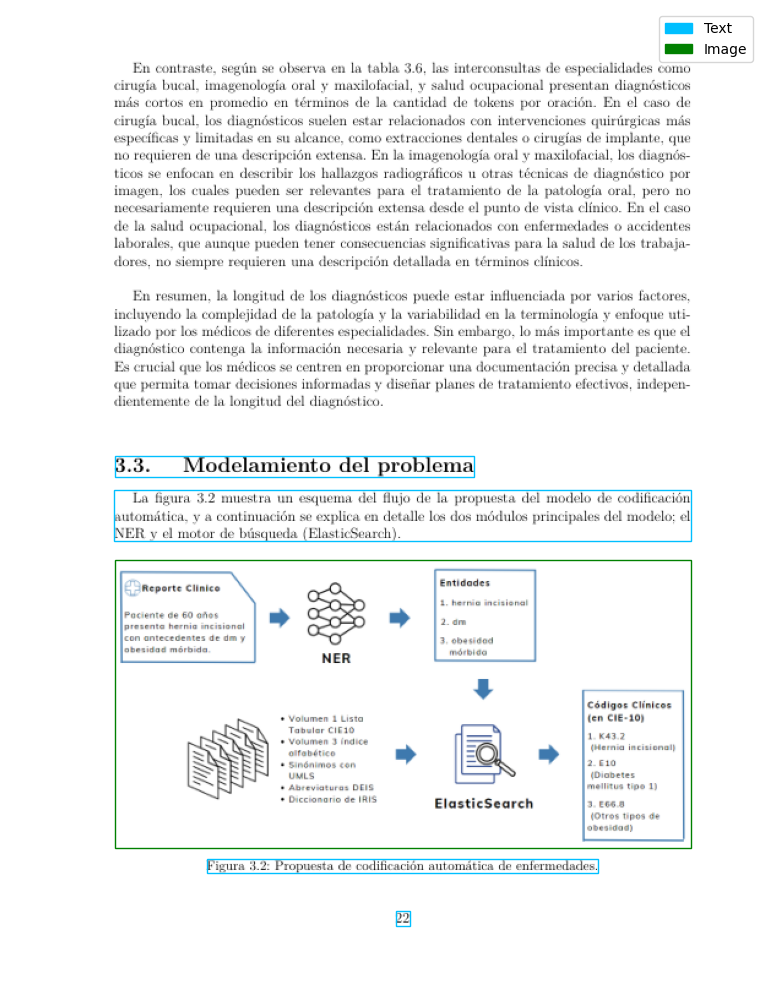

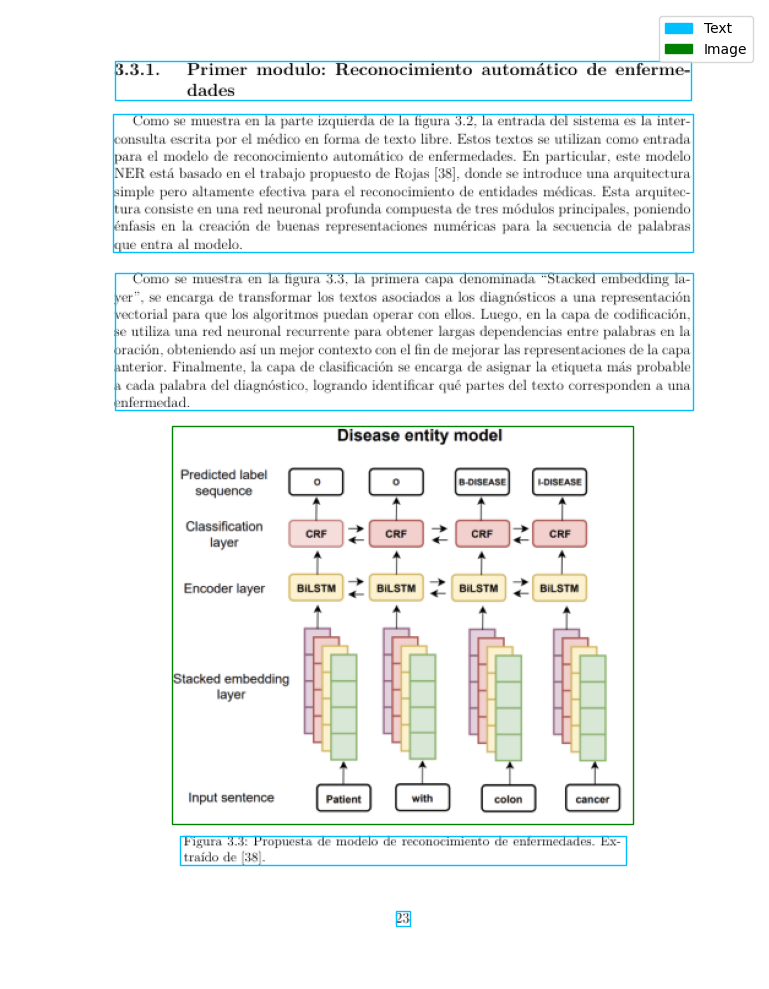

In [21]:
ur.display_chunk_pages(chunks_docs_1[20],doc_1['file_path'])